## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


###  INSIGHT INTO CURRENT MOVIE INDUSTRY

#### 1. BUSINESS UNDERSTANDING
In the world of movies, content is king. My goal is to provide comprehensive analysis and visualizations for you to make the most informed decision on what content to produce. The data-driven insights I'll provide will enhance your decision-making on aspects such as audience preference, domestic and global success of different genres, preferred writers and directors.

#### 2. DATA UNDERSTANDING

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

#### INITIAL EDA TO SELECT BEST FILE FOR ANALYSIS

First EDA on CSV files. Get the shape, first five rows, columns and data types held in each column.

In [47]:
tmbd_movies_csv = pd.read_csv('./zippedData/tmdb.movies.csv')
print(tmbd_movies_csv.shape)
print(tmbd_movies_csv.info())
tmbd_movies_csv.head()


(26517, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
movie_gross_csv = pd.read_csv('./zippedData/bom.movie_gross.csv')
print(movie_gross_csv.shape)
print(movie_gross_csv.info())
movie_gross_csv.head()

(3387, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [6]:
movie_budget_csv = pd.read_csv('./zippedData/tn.movie_budgets.csv')
print(movie_budget_csv.shape)
print(movie_budget_csv.info())
movie_budget_csv.head()

(5782, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


##### Initial EDA on TSV files

In [7]:
reviews_tsv = pd.read_csv('./zippedData/rt.reviews.tsv', sep='\t', header=0, encoding='windows-1252')
print(reviews_tsv.shape)
print(reviews_tsv.info())
reviews_tsv.head()

(54432, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [8]:
movie_info_tsv = pd.read_csv('./zippedData/rt.movie_info.tsv', sep='\t')
print(movie_info_tsv.shape)
print(movie_info_tsv.info())
# print(movie_info_tsv.isnull().sum())
movie_info_tsv.head()

(1560, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


##### INITIAL EDA on SQL database

In [10]:
conn = sqlite3.connect('./zippedData/im.db')
df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table'""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


### 3. DATA PREPARATION AND ANALYSIS

First review is from tmbd_movies data. This will give insight into which genre of movies is most popular.

In [69]:
tmbd_movies_csv.sort_values(by = 'popularity', ascending=False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...,...
13877,13877,[10749],401741,en,Crème Caramel,0.600,2014-05-20,Crème Caramel,5.0,1
13878,13878,[878],401427,en,Elegy,0.600,2014-09-10,Elegy,5.0,1
13879,13879,[35],399054,en,Jaguar,0.600,2014-09-21,Jaguar,5.0,1
13880,13880,[],381154,en,Unleashed! A Dog Dancing Story,0.600,2014-02-13,Unleashed! A Dog Dancing Story,5.0,1


The genre_ids column holds a list of genre ids for the movie as string literals. To convert the string literal to a list for better analysis, I've used ast.literal_eval method, which will safely evaluate strings containing Python values. 

In [49]:
import ast
# Evaluate the genre_ids column and get value as list instead of a string
tmbd_movies_csv['genre_ids'] = tmbd_movies_csv['genre_ids'].apply(ast.literal_eval)


To get a true picture of the most popular movie genre, I've consolidated the list in each row for the top 50 movies and converted it to a pandas series. 

In [131]:
Genre_and_popularity = tmbd_movies_csv[['genre_ids', 'popularity']]
Top_40 = tmbd_movies_csv.sort_values(by='popularity', ascending=False).head(40)

genre_id_dict = {28:'Action', 12:'Adventure', 16:'Animation', 35:'Comedy', 80:'Crime', 99:'Documentary', 18:'Drama',
                 10751:'Family', 14:'Fantasy', 36:'History', 27:'Horror', 10402: 'Music ', 9648:'Mystery', 10749:'Romance',
                 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}

popular_genre_list = pd.Series([genre_id_dict[genre_id] for row_list in Top_40['genre_ids'] for genre_id in row_list])
popular_genre_count = popular_genre_list.value_counts()

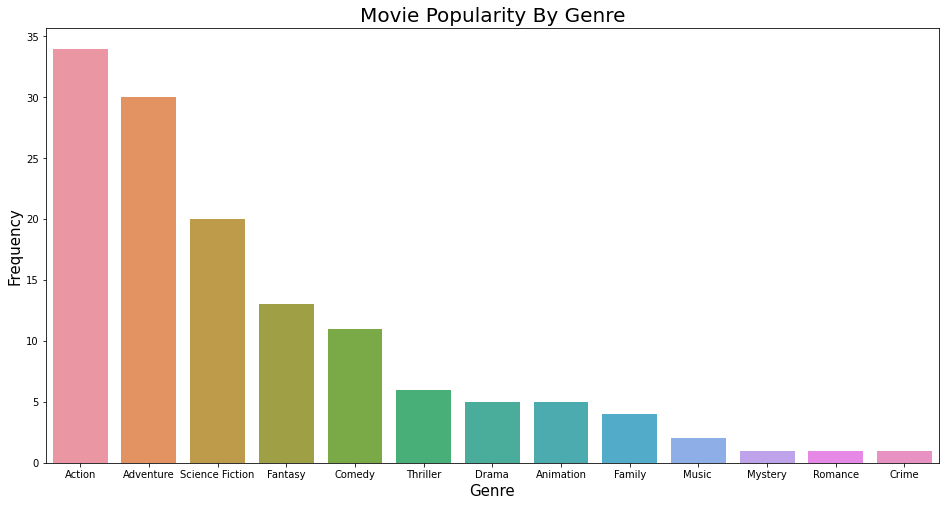

In [133]:
plt.figure(figsize = (16,8))
sns.barplot(x = popular_genre_count.index, y = popular_genre_count.values, order = popular_genre_count.index)
plt.title('Movie Popularity By Genre', fontdict={'fontsize': 20})
plt.xlabel('Genre', fontdict={'fontsize': 15})
plt.ylabel('Frequency', fontdict={'fontsize': 15})
plt.show()

## BUSINESS INSIGHT
1. The Top 5 movie genres by popularity are Action, Adventure, Science Fiction, Fantasy and Comedy. Allocate resources to the top genres and patner with the best studios and directors in these top genres.